<a href="https://colab.research.google.com/github/seoulartgirl/GithubPortfolio/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D10_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC%EC%9C%84%ED%95%9C%EB%94%A5%EB%9F%AC%EB%8B%9D4_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.15.0'

## IMDB 분류를 위한 RNN 모델 : LSTM 층 사용

LSTM
- 4개의 셀 : 입력, 망각(삭제), 출력, 기억
- 3개 게이트 : 입력, 출력, 망각
    - 망각(삭제) 게이트 : 셀 상태에 있는 정보를 제거하는 역할
    - 입력 게이트 : 새로운 정보를 셀 상태에 추가
    - 출력 게이트 : 이 셀 상태가 다음 은닉상태로 출력

#### 텐서플로의 LSTM : LSTM 셀을 사용한 순환층 클래스
- 첫번째 매개변수 : 뉴런의 개수
- dropout : 입력에 대한 드롭아웃 비율 지정
- return_sequences : 모든 타임스텝의 은닉 상태를 출력할 지 결정. 기본값은 False

#### imdb 데이터 로딩 및 데이터 전처리

In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 1000
maxlen = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

X_train.shape, X_test.shape

((25000, 500), (25000, 500))

#### 모델 정의 : LSTM 셀

In [ ]:
from keras.layers import Embedding, LSTM, Dense, GRU, SimpleRNN
from keras import Input, Model

inputs = keras.Input(shape=(None,))
batch_size = 32
x = Embedding(max_features, batch_size)(inputs)
x = LSTM(8)(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33321 (130.16 KB)
Trainable params: 33321 (130.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(Embedding(max_features, batch_size, input_length=maxlen))
model.add(LSTM(8))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm_2 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33321 (130.16 KB)
Trainable params: 33321 (130.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 컴파일 및 훈련

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/GithubPortfolio/DeepLearning/model/'

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpt = ModelCheckpoint(base_path + 'imdb_best_LSTM1.keras')
stopping = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpt, stopping])

Epoch 1/50
157/157 [==============================] - 10s 43ms/step - loss: 0.6927 - accuracy: 0.5290 - val_loss: 0.6921 - val_accuracy: 0.5570
Epoch 2/50
157/157 [==============================] - 4s 25ms/step - loss: 0.6914 - accuracy: 0.5644 - val_loss: 0.6907 - val_accuracy: 0.5898
Epoch 3/50
157/157 [==============================] - 4s 22ms/step - loss: 0.6896 - accuracy: 0.5903 - val_loss: 0.6886 - val_accuracy: 0.6026
Epoch 4/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6869 - accuracy: 0.6209 - val_loss: 0.6855 - val_accuracy: 0.6154
Epoch 5/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6827 - accuracy: 0.6339 - val_loss: 0.6805 - val_accuracy: 0.6344
Epoch 6/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6760 - accuracy: 0.6532 - val_loss: 0.6726 - val_accuracy: 0.6508
Epoch 7/50
157/157 [==============================] - 3s 22ms/step - loss: 0.6653 - accuracy: 0.6683 - val_loss: 0.6594 - val_accuracy: 0.671

#### 모델의 성능 시각화 : 정확도와 손실

In [ ]:
def draw_loss_val_plot(history):
    loss = ['loss', 'val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='train')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        # plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()

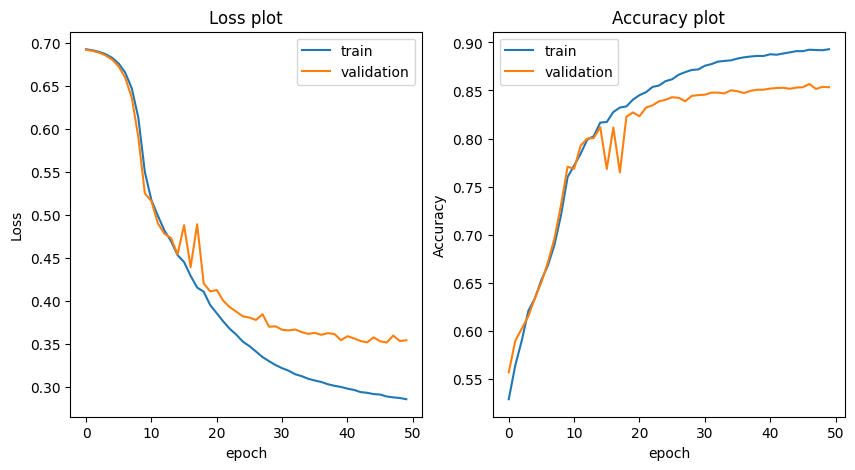

In [ ]:
draw_loss_val_plot(history)

#### 모델 평가

In [ ]:
from keras.models import load_model

model_lstm = load_model(base_path + 'imdb_best_LSTM1.keras')
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print(f'LSTM(셀 8개) : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

782/782 [==============================] - 8s 9ms/step - loss: 0.3465 - accuracy: 0.8582
LSTM(셀 8개) : Test loss=0.3465, Test accuracy=0.8582


In [ ]:
model_rnn = load_model(base_path + 'imdb_best_simpleRNN.h5')
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)
print(f'Simple RNN : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

- Simple RNN: Test loss=0.3725, Test accuracy=0.8475
- LSTM(셀 8개) : Test loss=0.3465, Test accuracy=0.8582
- SimpleRNN보다 LSTM이 더 성능이 좋음

### 순환 층에 드롭아웃 적용하기

#### 모델 생성

In [ ]:
model2 = keras.Sequential()
model2.add(Embedding(max_features, batch_size, input_length=maxlen))
model2.add(LSTM(8, dropout=0.3))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm_3 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33321 (130.16 KB)
Trainable params: 33321 (130.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 컴파일 & 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_name2 = base_path + 'imdb_best_LSTM2_dropout.h5'
checkpt = ModelCheckpoint(model_name2)
stopping = EarlyStopping(patience=3, restore_best_weights=True)
history2 = model2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpt, stopping])

Epoch 1/50
157/157 [==============================] - 8s 35ms/step - loss: 0.6922 - accuracy: 0.5380 - val_loss: 0.6914 - val_accuracy: 0.5654
Epoch 2/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6905 - accuracy: 0.5853 - val_loss: 0.6897 - val_accuracy: 0.5922
Epoch 3/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6882 - accuracy: 0.6059 - val_loss: 0.6869 - val_accuracy: 0.6194
Epoch 4/50
157/157 [==============================] - 4s 25ms/step - loss: 0.6844 - accuracy: 0.6332 - val_loss: 0.6823 - val_accuracy: 0.6362
Epoch 5/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6782 - accuracy: 0.6459 - val_loss: 0.6748 - val_accuracy: 0.6560
Epoch 6/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6673 - accuracy: 0.6712 - val_loss: 0.6609 - val_accuracy: 0.6714
Epoch 7/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6467 - accuracy: 0.6921 - val_loss: 0.6316 - val_accuracy: 0.7120

#### 모델 성능 시각화

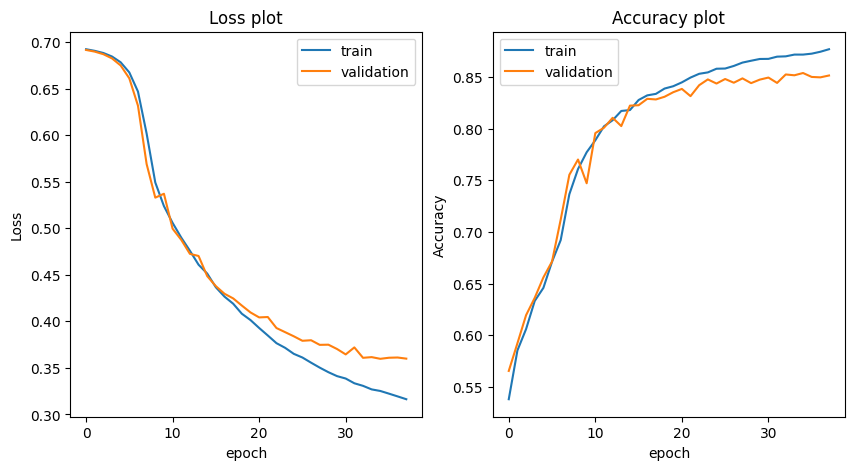

In [ ]:
draw_loss_val_plot(history2)

#### 모델 평가

In [ ]:
model_lstm2 = load_model(model_name2)
test_loss, test_acc = model_lstm2.evaluate(X_test, y_test)
print(f'LSTM(셀 8개), 순환층 Dropout 30% : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

782/782 [==============================] - 8s 9ms/step - loss: 0.3460 - accuracy: 0.8584
LSTM(셀 8개) : Test loss=0.3460, Test accuracy=0.8584


### 2개의 층을 연결하기

#### 모델 생성

In [ ]:
model3 = keras.Sequential()
model3.add(Embedding(max_features, batch_size, input_length=maxlen))
model3.add(LSTM(8, dropout=0.3, return_sequences=True)) # 다음 차원에도 유지해야함
model3.add(LSTM(8, dropout=0.3))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm_4 (LSTM)               (None, 500, 8)            1312      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33865 (132.29 KB)
Trainable params: 33865 (132.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 컴파일 & 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_name3 = base_path + 'imdb_best_LSTM3_multi2.h5'
checkpt = ModelCheckpoint(model_name3)
stopping = EarlyStopping(patience=3, restore_best_weights=True)
history3 = model3.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpt, stopping])

Epoch 1/50
157/157 [==============================] - 12s 56ms/step - loss: 0.6921 - accuracy: 0.5422 - val_loss: 0.6911 - val_accuracy: 0.5836
Epoch 2/50
  3/157 [..............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5599

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 7s 42ms/step - loss: 0.6889 - accuracy: 0.5997 - val_loss: 0.6863 - val_accuracy: 0.6092
Epoch 3/50
157/157 [==============================] - 6s 41ms/step - loss: 0.6796 - accuracy: 0.6256 - val_loss: 0.6708 - val_accuracy: 0.6588
Epoch 4/50
157/157 [==============================] - 7s 42ms/step - loss: 0.6508 - accuracy: 0.6787 - val_loss: 0.6262 - val_accuracy: 0.6888
Epoch 5/50
157/157 [==============================] - 7s 42ms/step - loss: 0.5881 - accuracy: 0.7273 - val_loss: 0.5492 - val_accuracy: 0.7540
Epoch 6/50
157/157 [==============================] - 6s 41ms/step - loss: 0.5294 - accuracy: 0.7637 - val_loss: 0.5108 - val_accuracy: 0.7788
Epoch 7/50
157/157 [==============================] - 6s 41ms/step - loss: 0.5073 - accuracy: 0.7742 - val_loss: 0.4919 - val_accuracy: 0.7908
Epoch 8/50
157/157 [==============================] - 6s 41ms/step - loss: 0.4871 - accuracy: 0.7879 - val_loss: 0.4811 - val_accuracy: 0.7904
Epoch 9/50

#### 모델 성능 시각화

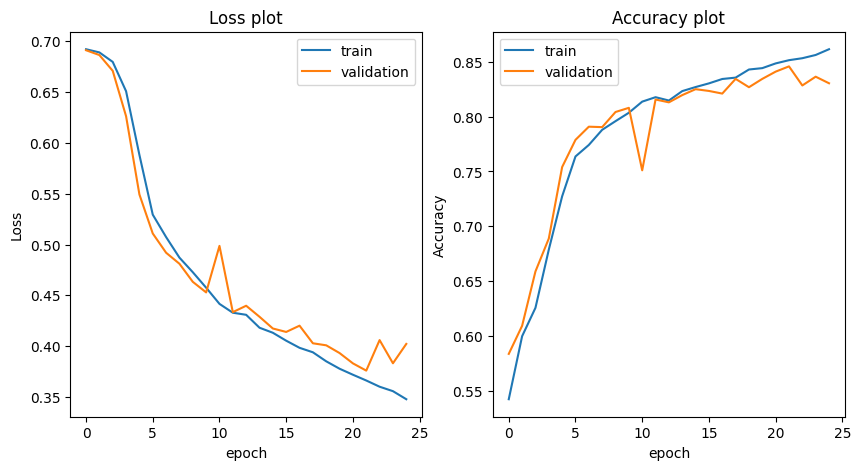

In [ ]:
draw_loss_val_plot(history3)

#### 모델 평가

In [ ]:
model_lstm3 = load_model(model_name3)
test_loss, test_acc = model_lstm3.evaluate(X_test, y_test)
print(f'LSTM(셀 8개), Dropout 30%, 2개 층 연결(Multi) : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

782/782 [==============================] - 14s 17ms/step - loss: 0.3949 - accuracy: 0.8332
LSTM(셀 8개) : Test loss=0.3949, Test accuracy=0.8332


- LSTM(셀 8개) : Test loss=0.3465, Test accuracy=0.8582
- 순환 층에 드롭아웃 적용: Test loss=0.3460, Test accuracy=0.8584
- 2개 층 연결: Test loss=0.3949, Test accuracy=0.8332

---

## IMDB 분류를 위한 RNN 모델 : GRU셀 사용

#### 텐서플로의 GRU : GRU 셀을 사용한 순환층 클래스

- 첫번째 매개변수 : 뉴런의 개수
- dropout : 입력에 대한 드롭아웃 비율 지정
- return_sequences : 모든 타임스텝의 은닉 상태를 출력할 지 결정. 기본값은 False

GRU
- 뉴욕대 조경현 교수 발명
- LSTM의 간소화 버전
- 게이트 (2개) : 리셋 게이트(입력), 업데이트 게이트

#### 1) 모델 생성

In [ ]:
model_gru = keras.Sequential()
model_gru.add(Embedding(max_features, batch_size, input_length=maxlen))
model_gru.add(GRU(8, dropout=0.3))
model_gru.add(Dense(1, activation="sigmoid"))
model_gru.summary() #1312-> 1008 300개 정도 줄어듬

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           32000     
                                                                 
 gru (GRU)                   (None, 8)                 1008      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33017 (128.97 KB)
Trainable params: 33017 (128.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm_2 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33321 (130.16 KB)
Trainable params: 33321 (130.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2) 모델 컴파일 및 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model_gru.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_name_gru = base_path + 'imdb_best_GRU_multi.h5'
checkpt = ModelCheckpoint(model_name_gru)
stopping = EarlyStopping(patience=3, restore_best_weights=True)
history_gru = model_gru.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpt, stopping])

Epoch 1/50
157/157 [==============================] - 7s 33ms/step - loss: 0.6926 - accuracy: 0.5153 - val_loss: 0.6924 - val_accuracy: 0.5180
Epoch 2/50
  7/157 [>.............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5290

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 4s 27ms/step - loss: 0.6919 - accuracy: 0.5369 - val_loss: 0.6917 - val_accuracy: 0.5356
Epoch 3/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6909 - accuracy: 0.5574 - val_loss: 0.6908 - val_accuracy: 0.5508
Epoch 4/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6899 - accuracy: 0.5622 - val_loss: 0.6897 - val_accuracy: 0.5622
Epoch 5/50
157/157 [==============================] - 4s 25ms/step - loss: 0.6885 - accuracy: 0.5775 - val_loss: 0.6884 - val_accuracy: 0.5696
Epoch 6/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6868 - accuracy: 0.5856 - val_loss: 0.6867 - val_accuracy: 0.5732
Epoch 7/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6848 - accuracy: 0.5933 - val_loss: 0.6847 - val_accuracy: 0.5826
Epoch 8/50
157/157 [==============================] - 4s 23ms/step - loss: 0.6820 - accuracy: 0.5974 - val_loss: 0.6821 - val_accuracy: 0.5868
Epoch 9/50

#### 3) 모델 성능 시각화

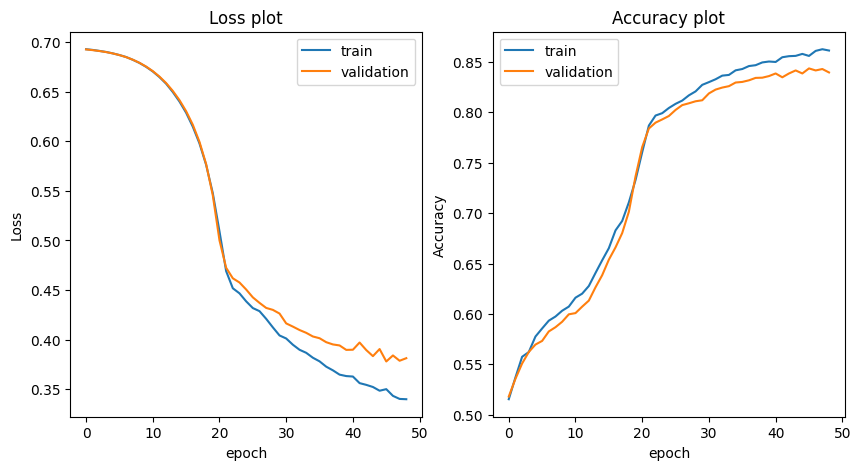

In [ ]:
draw_loss_val_plot(history_gru)

#### 4) 저장된 모델을 로드하여 테스트 데이터에 적용

In [ ]:
model_best_gru = load_model(model_name_gru)
test_loss, test_acc = model_best_gru.evaluate(X_test, y_test)
print(f'GRU(8) : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

782/782 [==============================] - 8s 10ms/step - loss: 0.3664 - accuracy: 0.8475
GRU(8) : Test loss=0.3664, Test accuracy=0.8475


dropout 제외

In [ ]:
model_gru2 = keras.Sequential()
model_gru2.add(Embedding(max_features, batch_size, input_length=maxlen))
model_gru2.add(GRU(8,))
model_gru2.add(Dense(1, activation="sigmoid"))
model_gru2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model_gru2.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_name_gru2 = base_path + 'imdb_best_GRU_nodropout_multi.h5'
checkpt = ModelCheckpoint(model_name_gru2)
stopping = EarlyStopping(patience=3, restore_best_weights=True)
history_gru2 = model_gru2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpt, stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           32000     
                                                                 
 gru_1 (GRU)                 (None, 8)                 1008      
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33017 (128.97 KB)
Trainable params: 33017 (128.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 7s 35ms/step - loss: 0.6925 - accuracy: 0.5280 - val_loss: 0.6920 - val_accuracy: 0.5380
Epoch 2/50
  4/157 [..............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5508

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 4s 24ms/step - loss: 0.6915 - accuracy: 0.5451 - val_loss: 0.6910 - val_accuracy: 0.5532
Epoch 3/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6902 - accuracy: 0.5649 - val_loss: 0.6897 - val_accuracy: 0.5644
Epoch 4/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6886 - accuracy: 0.5784 - val_loss: 0.6881 - val_accuracy: 0.5708
Epoch 5/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6864 - accuracy: 0.5876 - val_loss: 0.6859 - val_accuracy: 0.5822
Epoch 6/50
157/157 [==============================] - 4s 25ms/step - loss: 0.6835 - accuracy: 0.5943 - val_loss: 0.6830 - val_accuracy: 0.5862
Epoch 7/50
157/157 [==============================] - 4s 24ms/step - loss: 0.6798 - accuracy: 0.6011 - val_loss: 0.6794 - val_accuracy: 0.5938
Epoch 8/50
157/157 [==============================] - 4s 22ms/step - loss: 0.6752 - accuracy: 0.6050 - val_loss: 0.6747 - val_accuracy: 0.5970
Epoch 9/50

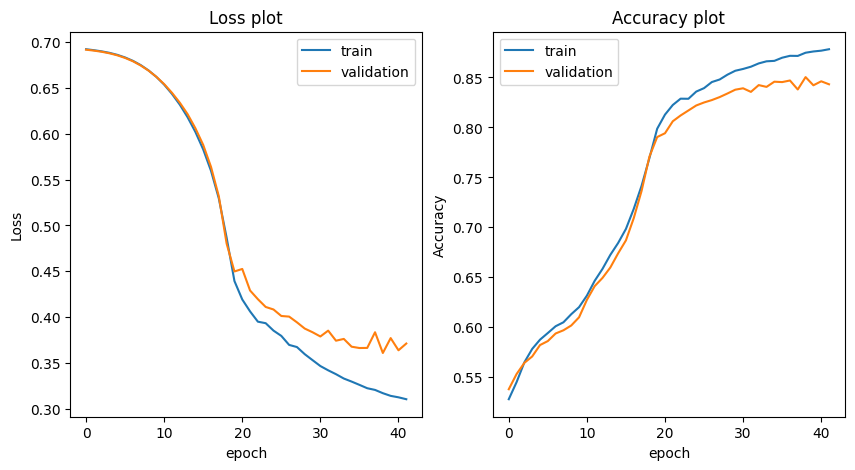

In [ ]:
draw_loss_val_plot(history_gru2)

In [ ]:
model_best_gru2 = load_model(model_name_gru2)
test_loss, test_acc = model_best_gru2.evaluate(X_test, y_test)
print(f'GRU(8)_NoDropout : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')

782/782 [==============================] - 8s 10ms/step - loss: 0.3576 - accuracy: 0.8494
GRU(8) : Test loss=0.3576, Test accuracy=0.8494


- LSTM(셀 8개) : Test loss=0.3465, Test accuracy=0.8582
- 순환 층에 드롭아웃 적용: Test loss=0.3460, Test accuracy=0.8584
- 2개 층 연결: Test loss=0.3949, Test accuracy=0.8332
- GRU(8) : Test loss=0.3664, Test accuracy=0.8475
- GRU(8)_NoDropout : Test loss=0.3576, Test accuracy=0.8494

GRU 연습문제
- unit = 8, 12, 16인 경우
- dropout = 0.3, 0.7인 경우
- GRU 층 = 2개, 3개인 경우
- epochs = 100

In [ ]:
def GRU_modeling(unit=8, dropout=0.3, is_layer=False, epochs=100):
    model = keras.Sequential()
    model.add(Embedding(max_features, batch_size, input_length=maxlen))
    model.add(GRU(unit, dropout=dropout))
    model.add(Dense(1, activation="sigmoid"))

    rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
    model.compile(optimizer=rmsprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model_name = base_path + 'imdb_best_GRU_multi.h5'
    checkpt = ModelCheckpoint(model_name)
    stopping = EarlyStopping(patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=128,
                        validation_split=0.2,
                        callbacks=[checkpt, stopping])

    model_best = load_model(model_name)
    test_loss, test_acc = model_best.evaluate(X_test, y_test)
    print(f'GRU(8) : Test loss={test_loss:.4f}, Test accuracy={test_acc:.4f}')
    draw_loss_val_plot(history)

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/GithubPortfolio/DeepLearning

/content/drive/MyDrive/Colab Notebooks/GithubPortfolio/DeepLearning


In [ ]:
!git config --global user.email 'seoulartgirl@gmail.com'
!git config --global user.name 'seoulartgirl'

In [ ]:
!git add 딥러닝10_텍스트를위한딥러닝4_LSTM_GRU.ipynb

In [ ]:
!git commit -m "crytsal's commit"
!git push

^C
Enumerating objects: 436, done.
^C


---